In [1]:
# Importing Necessery liabraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)


In [2]:
#  Importing dataset
df = pd.read_csv(r"C:\Users\Abhijeet\Desktop\My Data\Data-Science-ML-Capstone-Projects-master\Automobile_insurance_fraud.csv")

In [3]:
# Printing first five rows of  the dataset
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

Here we have 1000 rows and 40 diffrent columns in our datset.

In [5]:
# Checking datatypes of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We have 19 numerical and 21 object datatype columns

In [6]:
# Checking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Our last column _c39 have all null values hence dropping the column

In [8]:
df.drop('_c39', axis = 1 , inplace = True)

In [9]:
# Checking missing values 
for column in df:
    if np.dtype(df[column])=='O':
        print(df[column].value_counts())
        
    else:
        continue
       
       
    


05-08-1992    3
01-01-2006    3
28-04-1992    3
20-09-1990    2
16-05-2008    2
             ..
03-12-2005    1
12-07-2013    1
29-03-2004    1
08-05-1995    1
18-09-1999    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

we dont see any Nans present but we do '?' present in some columns

In [10]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [11]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [12]:
df = pd.read_csv(r"C:\Users\Abhijeet\Desktop\My Data\Data-Science-ML-Capstone-Projects-master\Automobile_insurance_fraud.csv", 
                   usecols= ['months_as_customer', 
                             'age', 
                             'policy_bind_date',
                             'policy_state',
                             'policy_csl',
                             'policy_deductable',
                             'policy_annual_premium',
                             'umbrella_limit',
                             'insured_zip',
                             'insured_sex',
                             'insured_education_level',
                             'insured_occupation',
                             'insured_hobbies',
                             'insured_relationship',
                             'capital-gains',
                             'capital-loss',
                             'incident_date',
                             'incident_type',
                             'collision_type',
                             'incident_severity',
                             'authorities_contacted',
                             'incident_state',
                             'incident_city',
                             'incident_hour_of_the_day',
                             'number_of_vehicles_involved',
                             'property_damage',
                             'bodily_injuries',
                             'witnesses',
                             'police_report_available',
                             'total_claim_amount',
                             'injury_claim',
                             'property_claim',
                             'vehicle_claim',
                             'auto_year',
                             'fraud_reported'], 
                   na_values=['?'], na_filter = True, parse_dates = ['policy_bind_date','incident_date'], dayfirst = True)

In [13]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,0,0,NaN,5070,780,780,3510,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NaN,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,0,1,NO,6500,1300,650,4550,2009,N


In [14]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [15]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [16]:
df['collision_type'].fillna(df['collision_type'].value_counts().index[0], inplace = True)
df['property_damage'].fillna(df['property_damage'].value_counts().index[0], inplace = True)
df['police_report_available'].fillna(df['police_report_available'].value_counts().index[0], inplace = True)

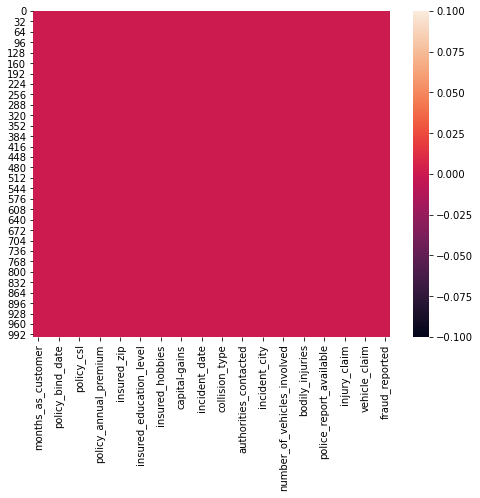

In [17]:
plt.figure(figsize = (8,6))
sns.heatmap(df.isnull())
plt.show()

In [18]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                    

In [19]:
df['policy_bind_day'] = pd.to_datetime(df.policy_bind_date, format = '%d/%m/%Y').dt.day
df['policy_bind_month'] = pd.to_datetime(df.policy_bind_date, format = '%d/%m/%Y').dt.month
df['policy_bind_year'] = pd.to_datetime(df.policy_bind_date, format = '%d/%m/%Y').dt.year

In [20]:

df['incident_day'] = pd.to_datetime(df.incident_date, format = '%d/%m/%Y').dt.day
df['incident_month'] = pd.to_datetime(df.incident_date, format = '%d/%m/%Y').dt.month

In [21]:
df.drop(['policy_bind_date', 'incident_date'], axis = 1 , inplace = True)

In [22]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,6510,13020,52080,2004,Y,17,10,2014,25,1
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,780,780,3510,2007,Y,27,6,2006,21,1
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,7700,3850,23100,2007,N,6,9,2000,22,2
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,6340,6340,50720,2014,Y,25,5,1990,10,1
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1300,650,4550,2009,N,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,17440,8720,61040,2006,N,16,7,1991,22,2
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,18080,18080,72320,2015,N,5,1,2014,24,1
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,7500,7500,52500,1996,N,17,2,2003,23,1
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,5220,5220,36540,1998,N,18,11,2011,26,2


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

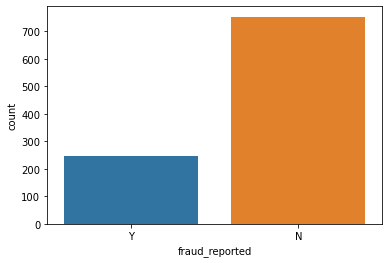

In [23]:
sns.countplot(x = 'fraud_reported', data = df)

We have more number of cases where fraud was not reported 

In [24]:
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

In [25]:
age_vs_fraud = pd.crosstab(df['age_bins'], df['fraud_reported'])

In [26]:
age_vs_fraud

fraud_reported,N,Y
age_bins,,
11-20,1,1
21-30,150,45
31-40,302,94
41-50,221,72
51-60,66,30
61-70,13,5


<AxesSubplot:xlabel='age_bins'>

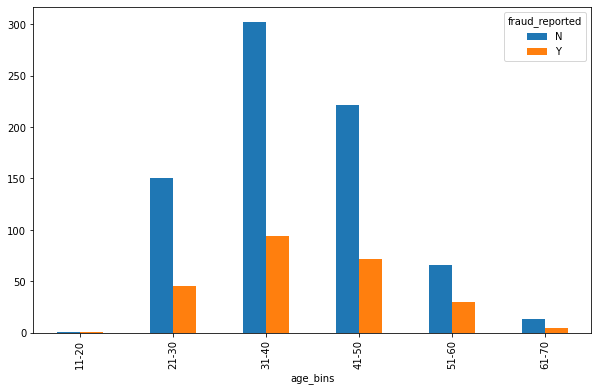

In [27]:
age_vs_fraud.plot(kind = 'bar', figsize = (10,6))

We can see in above gplot that more frauds are reported in age limit 31 to 50

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

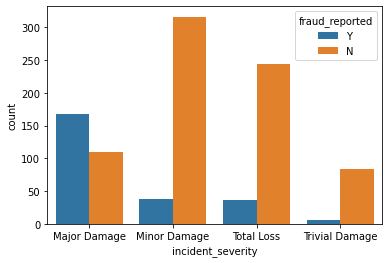

In [28]:
sns.countplot(x = 'incident_severity',hue = 'fraud_reported', data = df )

We can see in above plot that we have more number of cases where fraud reported in Major damage caes than minor and Trivial damage

In [29]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year',
       'fraud_reported', 'policy_bind_day', 'policy_bind_month',
       'policy_bind_year', 'incident_day', 'incident_month', 'age_bins'],
      dtype='object')

In [30]:
df['months_as_customer'].max()


479

In [31]:
cust = pd.cut(df.months_as_customer, bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500], include_lowest = True, labels = ['0-50','50-100','100-150','150-200', '200-250', '250-300', '300-350','350-400','400-450','450-500'])

In [32]:
cust_vs_fraud = pd.crosstab(cust, df['fraud_reported'])

In [33]:
cust_vs_fraud

fraud_reported,N,Y
months_as_customer,,
0-50,68,23
50-100,86,26
100-150,127,36
150-200,98,39
200-250,119,34
250-300,135,39
300-350,39,14
350-400,27,14
400-450,36,14


<AxesSubplot:xlabel='months_as_customer'>

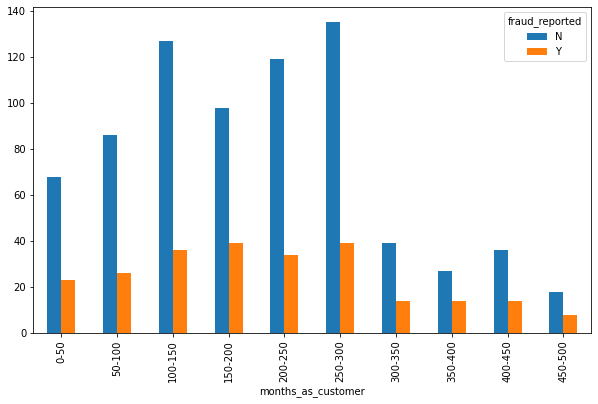

In [34]:
cust_vs_fraud.plot(kind = 'bar', figsize = (10,6))

Above graph shows that more frauds are reported from customers with 150 to 300 motnths old customers

In [35]:
print(df.total_claim_amount.min())
print(df.total_claim_amount.max())

100
114920


In [36]:
claim_bins = pd.cut(df.total_claim_amount, bins = [0, 11500, 33000, 44800, 56300, 67800, 79300, 90800, 102300, 113800, 125300], include_lowest = True, labels = ['0-11500','11501-33000','33001-44800','444801-56300', '56301-67800', '67801-79300', '79301-90800','90801-102300','102301-113800','113801-125300']) 

In [37]:
total_claim_vs_fraud = pd.crosstab(claim_bins, df.fraud_reported)

In [38]:
total_claim_vs_fraud

fraud_reported,N,Y
total_claim_amount,,
0-11500,162,16
11501-33000,19,3
33001-44800,63,19
444801-56300,127,58
56301-67800,174,58
67801-79300,118,57
79301-90800,64,24
90801-102300,20,9
102301-113800,5,3


<AxesSubplot:xlabel='total_claim_amount'>

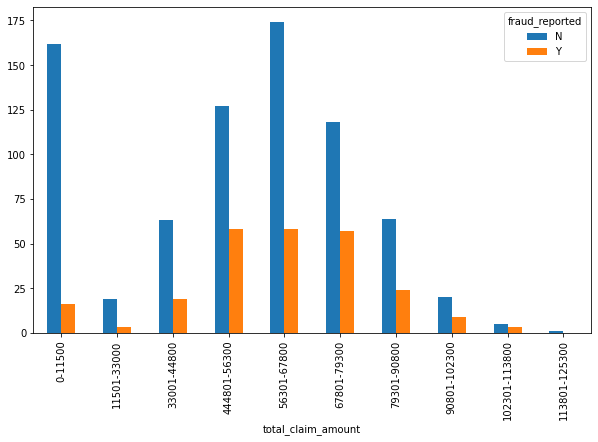

In [39]:
total_claim_vs_fraud.plot(kind = 'bar', figsize = (10,6))

We have high number of claims between price range 444801 to 79300 

Whereas for lower amount ie 0 to 11500 number of fraud claims are very low

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

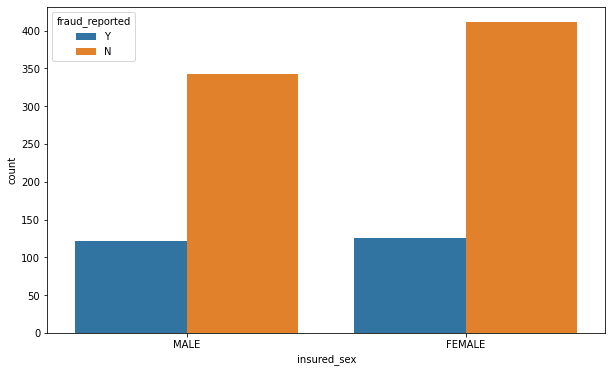

In [40]:
plt.figure(figsize = (10,6))

sns.countplot(x = 'insured_sex', hue = 'fraud_reported', data = df )

We can see in above plot that males are more likely to report fraud

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

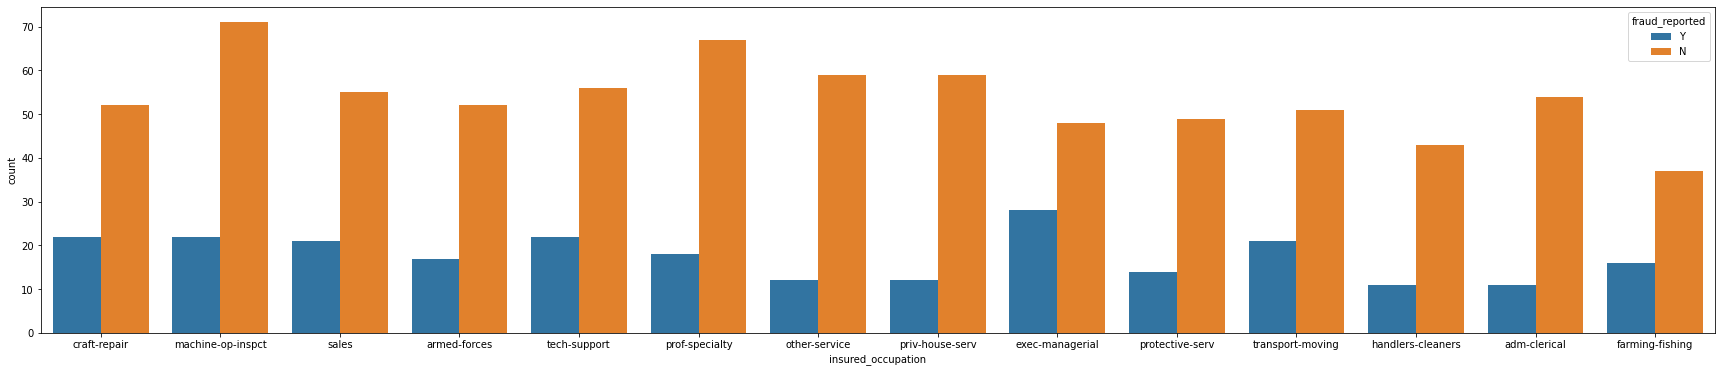

In [41]:
plt.figure(figsize = (30,6))
sns.countplot(x = 'insured_occupation', hue = 'fraud_reported', data = df )

We can see percentage of fraud reporting is higher in exec-managerial and transport-moving occupation 

<AxesSubplot:xlabel='incident_type', ylabel='count'>

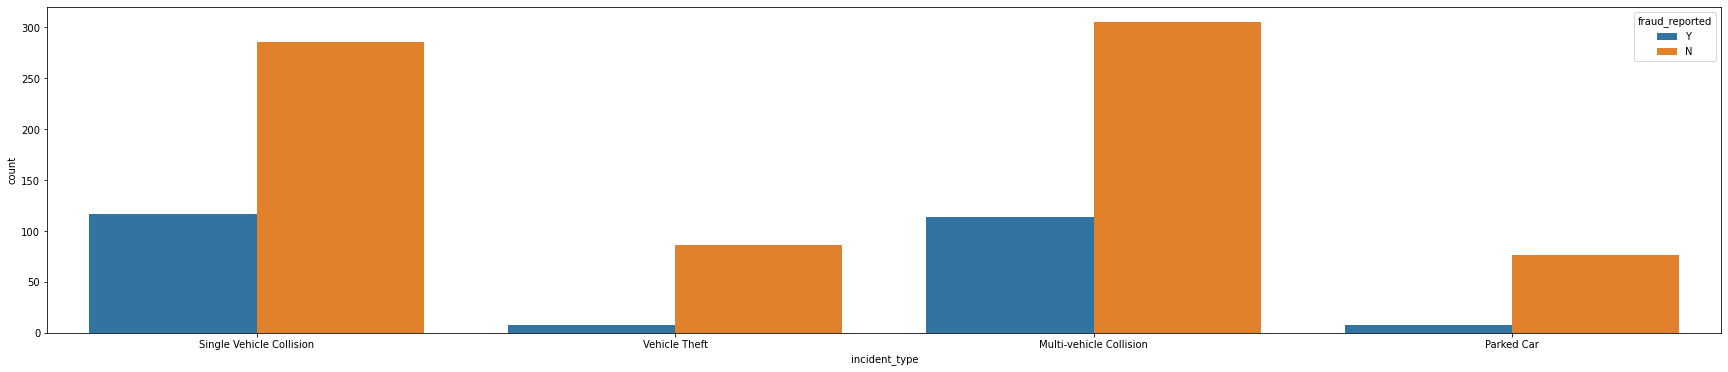

In [42]:

plt.figure(figsize = (30,6))
sns.countplot(x = 'incident_type', hue = 'fraud_reported', data = df )

We can see in above plot more frauds are reported for single vehicle collosion and there is less chance of fraud reporting of a parked car

<AxesSubplot:xlabel='collision_type', ylabel='count'>

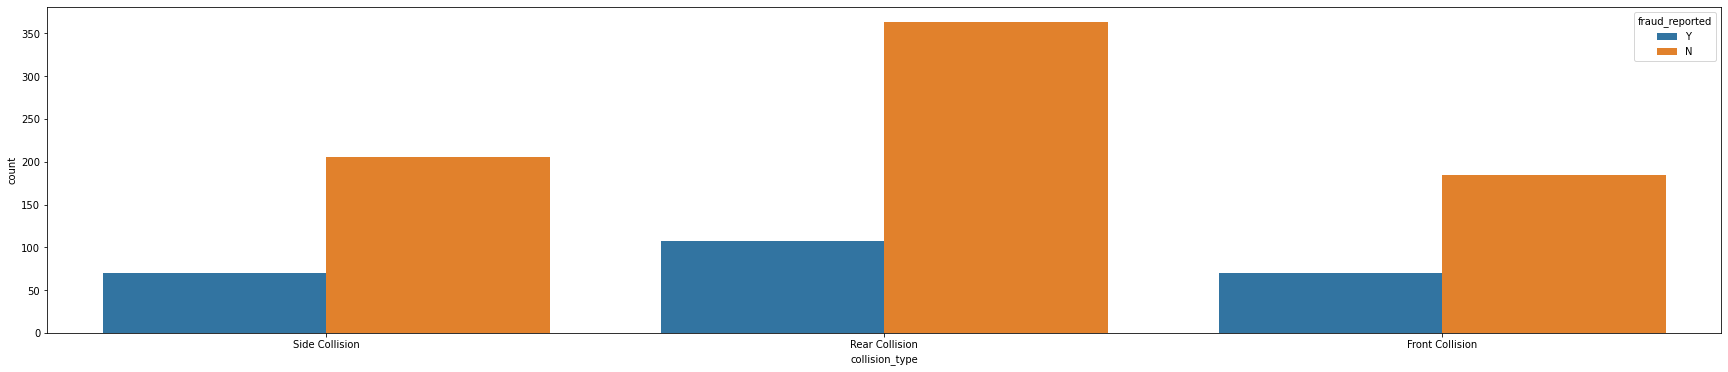

In [43]:

plt.figure(figsize = (30,6))
sns.countplot(x = 'collision_type', hue = 'fraud_reported', data = df )

As we can see we have more counts with rear collosion frauds reported being aware we have filled Nans in this columns, rear collision is more impactful in fraud report

In [44]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year',
       'fraud_reported', 'policy_bind_day', 'policy_bind_month',
       'policy_bind_year', 'incident_day', 'incident_month', 'age_bins'],
      dtype='object')

<AxesSubplot:xlabel='incident_state', ylabel='count'>

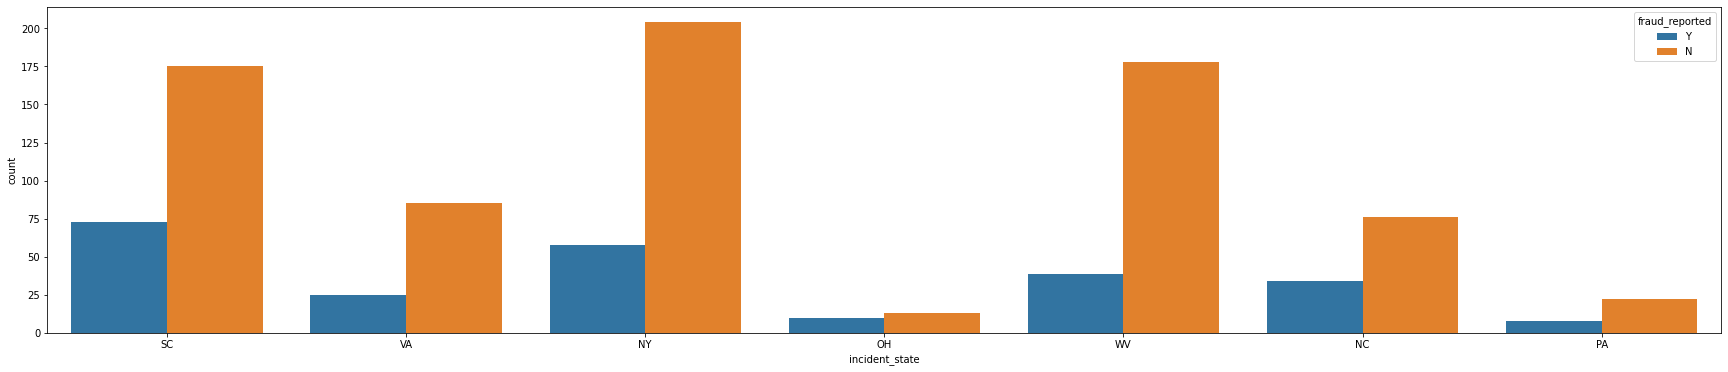

In [45]:
plt.figure(figsize = (30,6))
sns.countplot(x = 'incident_state', hue = 'fraud_reported', data = df )

We can see percentage of fraud reported is higher in states SC and OH

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

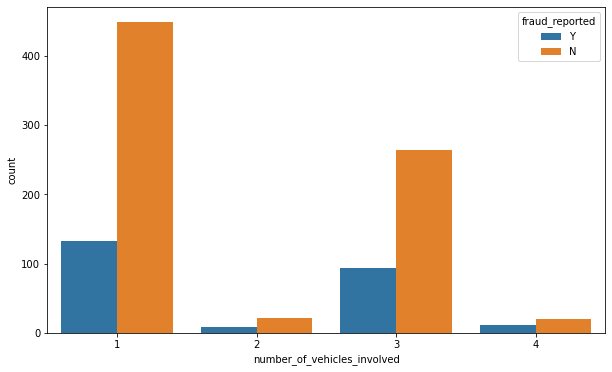

In [46]:

plt.figure(figsize = (10,6))
sns.countplot(x = 'number_of_vehicles_involved', hue = 'fraud_reported', data = df )

We can see in above graph that number of fraud eported is more when 2 or more vehicles are invloved 

<AxesSubplot:xlabel='property_damage', ylabel='count'>

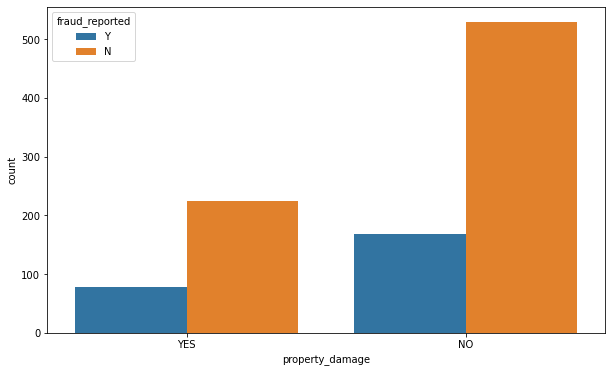

In [47]:

plt.figure(figsize = (10,6))
sns.countplot(x = 'property_damage', hue = 'fraud_reported', data = df )

It is obvious that in case of property damage there are more chances of fraud to be reported

In [48]:
print(df['injury_claim'].max())
print(df['vehicle_claim'].max())
print(df['property_claim'].max())

21450
79560
23670


In [49]:
veh_bins = pd.cut(df.vehicle_claim, bins = [0,10000,20000,30000,40000,50000,60000,70000,80000 ], include_lowest = True, labels = ['0-10000','10000-20000','20000-30000','30000-40000', '40000-50000', '50000-60000', '60000-70000','70000-80000'])
inj_bins = pd.cut(df.injury_claim, bins = [0, 3000, 6000, 9000, 12000,15000,18000, 21000, 24000 ], include_lowest = True, labels = ['0-3000','3000-6000','6000-9000','9000-12000', '12000-15000', '15000-18000', '18000-21000','21000-24000'])
prop_bins = pd.cut(df.property_claim, bins = [0, 3000, 6000, 9000, 12000,15000,18000, 21000, 24000 ], include_lowest = True, labels = ['0-3000','3000-6000','6000-9000','9000-12000', '12000-15000', '15000-18000', '18000-21000','21000-24000']) 

In [50]:
veh_binsvs_fraud = pd.crosstab(veh_bins, df.fraud_reported)
inj_binsvs_fraud = pd.crosstab(inj_bins, df.fraud_reported)
prop_binsvs_fraud = pd.crosstab(prop_bins, df.fraud_reported)

<AxesSubplot:xlabel='vehicle_claim'>

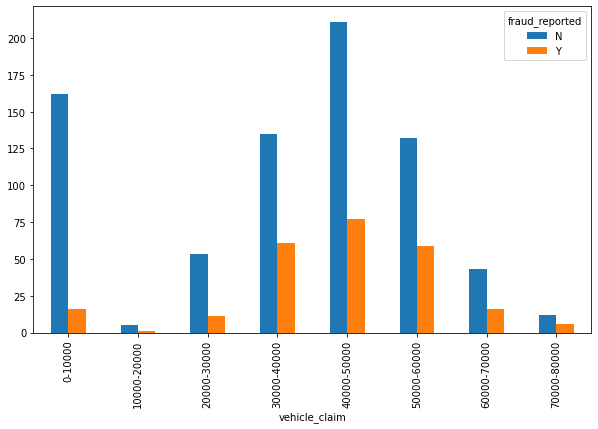

In [51]:
veh_binsvs_fraud.plot(kind = 'bar', figsize = (10,6))

We can see in above plot that more frauds are reported when vehicle bill is between 30000 to 60000

<AxesSubplot:xlabel='injury_claim'>

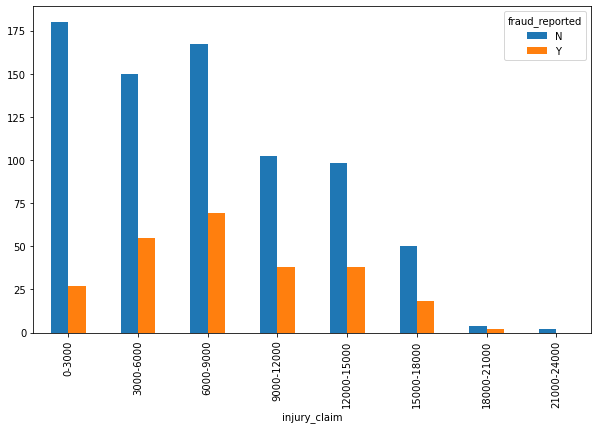

In [52]:
inj_binsvs_fraud.plot(kind = 'bar', figsize = (10,6))

We can see in above plot that more frauds are reported when Injury  claim is netween 3000 to 15000

<AxesSubplot:xlabel='property_claim'>

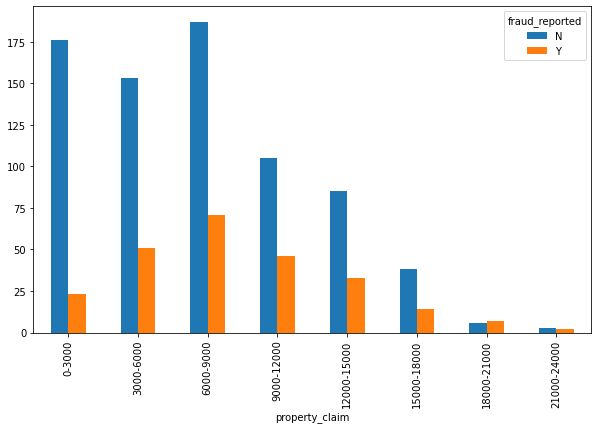

In [53]:
prop_binsvs_fraud.plot(kind = 'bar', figsize = (10,6))

Most frauds are reported when for property claim is 3000 to 15000 

In [54]:
df.drop(columns = ['policy_csl','insured_zip','insured_education_level','insured_occupation', 'insured_occupation','insured_hobbies','insured_relationship', 'incident_state', 'incident_city', 'incident_type', 'authorities_contacted', 'property_damage','age_bins', ], axis = 1, inplace = True)

In [55]:
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,collision_type,...,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,OH,1000,1406.91,0,MALE,53300,0,Side Collision,...,6510,13020,52080,2004,Y,17,10,2014,25,1
1,228,42,IN,2000,1197.22,5000000,MALE,0,0,Rear Collision,...,780,780,3510,2007,Y,27,6,2006,21,1
2,134,29,OH,2000,1413.14,5000000,FEMALE,35100,0,Rear Collision,...,7700,3850,23100,2007,N,6,9,2000,22,2
3,256,41,IL,2000,1415.74,6000000,FEMALE,48900,-62400,Front Collision,...,6340,6340,50720,2014,Y,25,5,1990,10,1
4,228,44,IL,1000,1583.91,6000000,MALE,66000,-46000,Rear Collision,...,1300,650,4550,2009,N,6,6,2014,17,2


In [57]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'capital-gains', 'capital-loss', 'collision_type', 'incident_severity',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported', 'policy_bind_day', 'policy_bind_month',
       'policy_bind_year', 'incident_day', 'incident_month'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   capital-gains                1000 non-null   int64  
 8   capital-loss                 1000 non-null   int64  
 9   collision_type               1000 non-null   object 
 10  incident_severity            1000 non-null   object 
 11  incident_hour_of_the_day     1000 non-null   int64  
 12  number_of_vehicles_involved  1000 non-null   int64  
 13  bodily_injuries    

In [59]:

for column in df:
    if np.dtype(df[column])=='O':
        print(df[column].value_counts())
        
    else:
        continue

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64
NO     686
YES    314
Name: police_report_available, dtype: int64
N    753
Y    247
Name: fraud_reported, dtype: int64


In [61]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

df['policy_state'] = Le.fit_transform(df['policy_state'])
df['insured_sex'] = Le.fit_transform(df['insured_sex'])
df['collision_type'] = Le.fit_transform(df['collision_type'])
df['incident_severity'] = Le.fit_transform(df['incident_severity'])
df['police_report_available'] = Le.fit_transform(df['police_report_available'])
df['fraud_reported'] = Le.fit_transform(df['fraud_reported'])

In [63]:
df.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,collision_type,...,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
months_as_customer,1.000000,0.922098,-0.000328,0.026807,0.005018,0.015498,0.060925,0.006399,0.020209,-0.072787,...,0.065329,0.034940,0.061013,-0.000292,0.020544,0.054809,-0.001559,-0.048276,-0.001455,-0.042826
age,0.922098,1.000000,-0.014533,0.029188,0.014404,0.018126,0.073337,-0.007075,0.007368,-0.075642,...,0.075522,0.060898,0.062588,0.001354,0.012143,0.056776,0.008357,-0.037444,0.003697,-0.037058
policy_state,-0.000328,-0.014533,1.000000,0.010033,0.012455,-0.029580,-0.020481,0.074551,-0.030338,0.052438,...,-0.046290,0.008406,0.001425,0.002114,0.029432,0.011178,0.046871,-0.007276,0.025572,0.018531
policy_deductable,0.026807,0.029188,0.010033,1.000000,-0.003245,0.010870,-0.009733,0.035212,-0.023544,-0.053912,...,0.039107,0.064792,0.005269,0.026105,0.014817,-0.000265,-0.025020,-0.049598,-0.022701,-0.026416
policy_annual_premium,0.005018,0.014404,0.012455,-0.003245,1.000000,-0.006247,0.038853,-0.013738,0.023547,0.036556,...,-0.017633,-0.011654,0.020246,-0.049226,-0.014480,-0.037933,-0.002480,0.001249,0.028797,-0.046097
umbrella_limit,0.015498,0.018126,-0.029580,0.010870,-0.006247,1.000000,0.010688,-0.047268,-0.024056,0.010041,...,-0.045412,-0.023790,-0.038584,0.009893,0.058622,-0.023361,-0.045871,0.048008,-0.009974,-0.002576
insured_sex,0.060925,0.073337,-0.020481,-0.009733,0.038853,0.010688,1.000000,-0.020494,-0.021705,-0.014293,...,0.000924,-0.014868,-0.029609,-0.028247,0.030873,0.039769,-0.001042,-0.032891,0.001924,-0.025471
capital-gains,0.006399,-0.007075,0.074551,0.035212,-0.013738,-0.047268,-0.020494,1.000000,-0.046904,-0.006170,...,0.025934,-0.000779,0.015836,0.031398,-0.019173,-0.004664,0.021193,0.041249,0.031922,-0.037097
capital-loss,0.020209,0.007368,-0.030338,-0.023544,0.023547,-0.024056,-0.021705,-0.046904,1.000000,0.041494,...,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863,-0.025983,-0.028124,-0.026420,-0.009696,0.005949
collision_type,-0.072787,-0.075642,0.052438,-0.053912,0.036556,0.010041,-0.014293,-0.006170,0.041494,1.000000,...,-0.024996,-0.003844,-0.009127,-0.001204,-0.017315,-0.001539,0.012847,0.026098,0.046319,0.010733


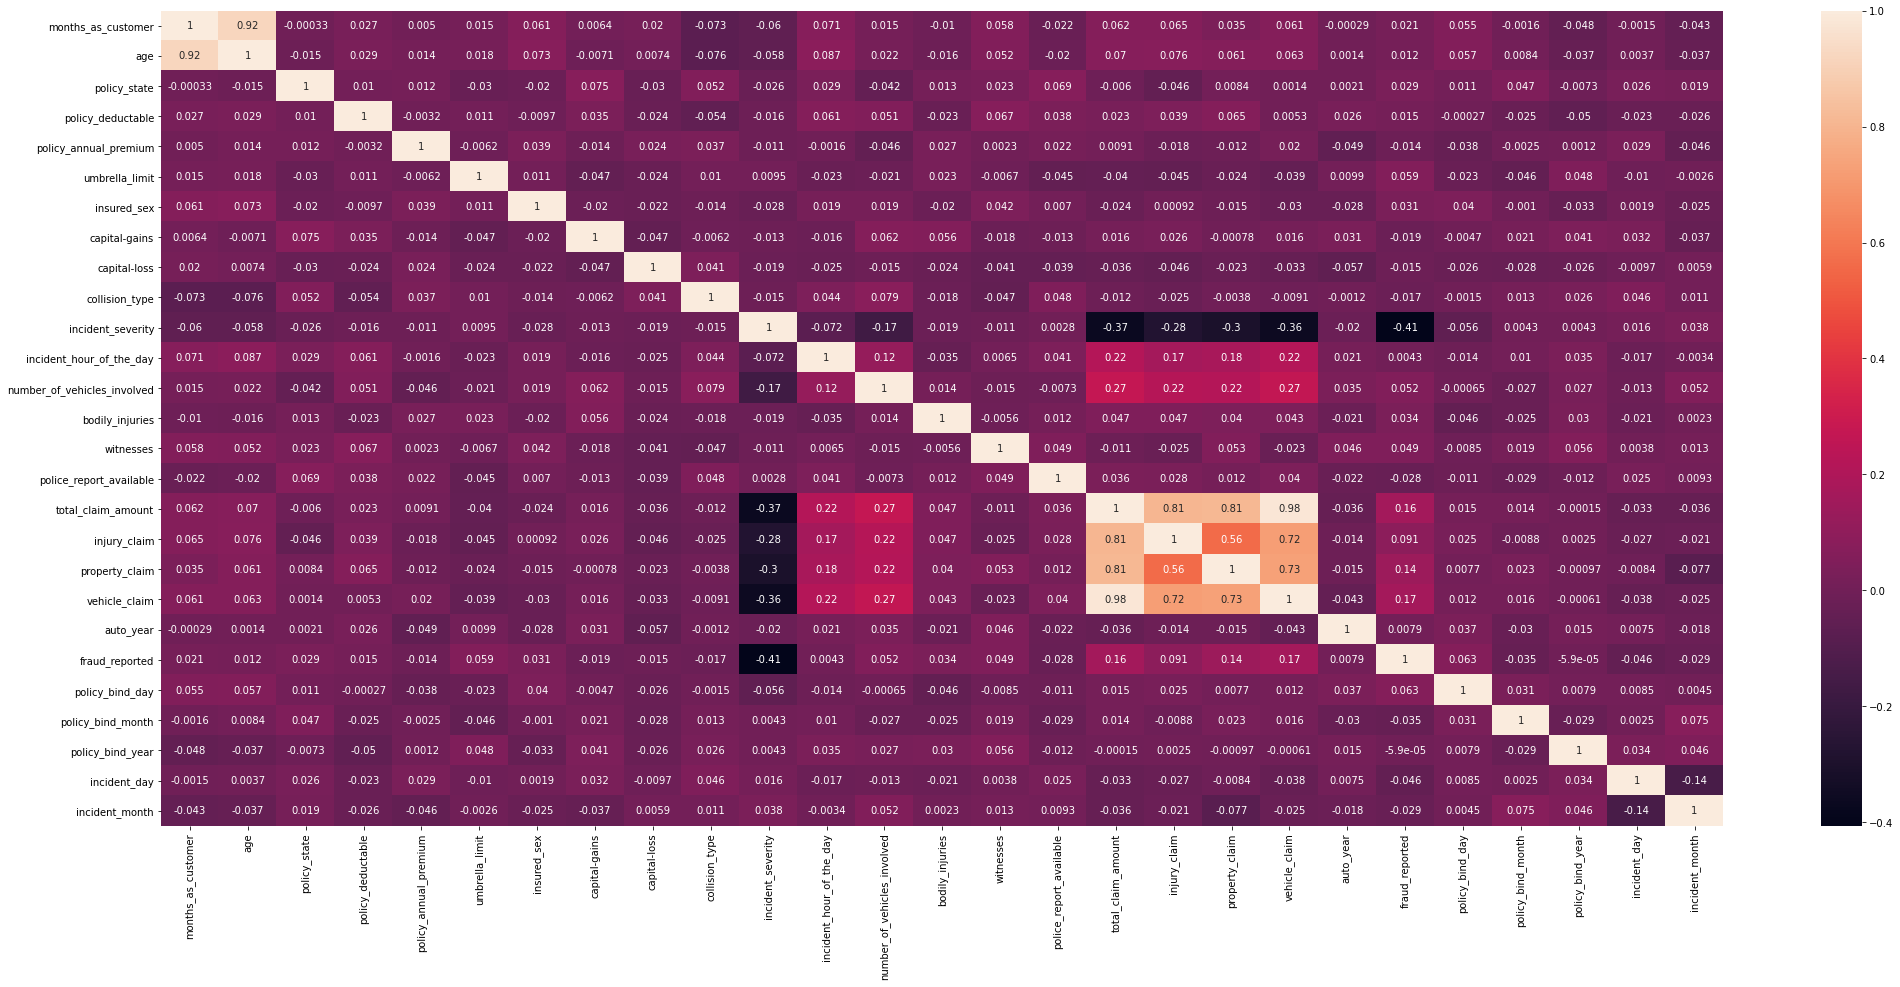

In [66]:
plt.figure(figsize = (35,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

Heatmap analysis shows that our target column has strong negative correlation with the incident_survey column

Also total_cliam has 98% correlation with the vehicle claim .

Also 92 % correlation exists between months as customer and age

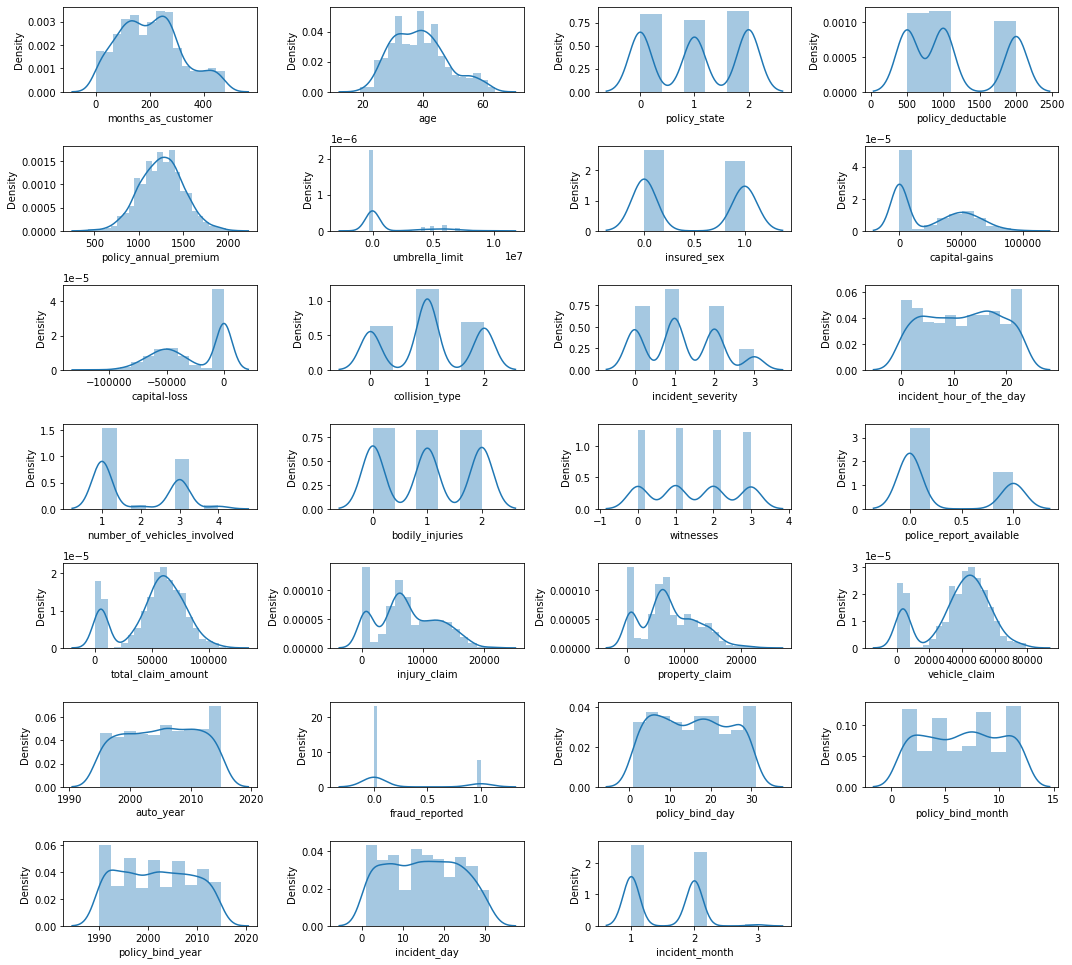

In [68]:
# Checking data Distribution

plt.figure(figsize = (15,15), facecolor = 'white')

plotnumber = 1

for column in df:
    if plotnumber <=27:
        ax = plt.subplot(8,4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.tight_layout()

Excepting our categorical columns our data is not normally distributed and contains skewness which needs to be removed before model building

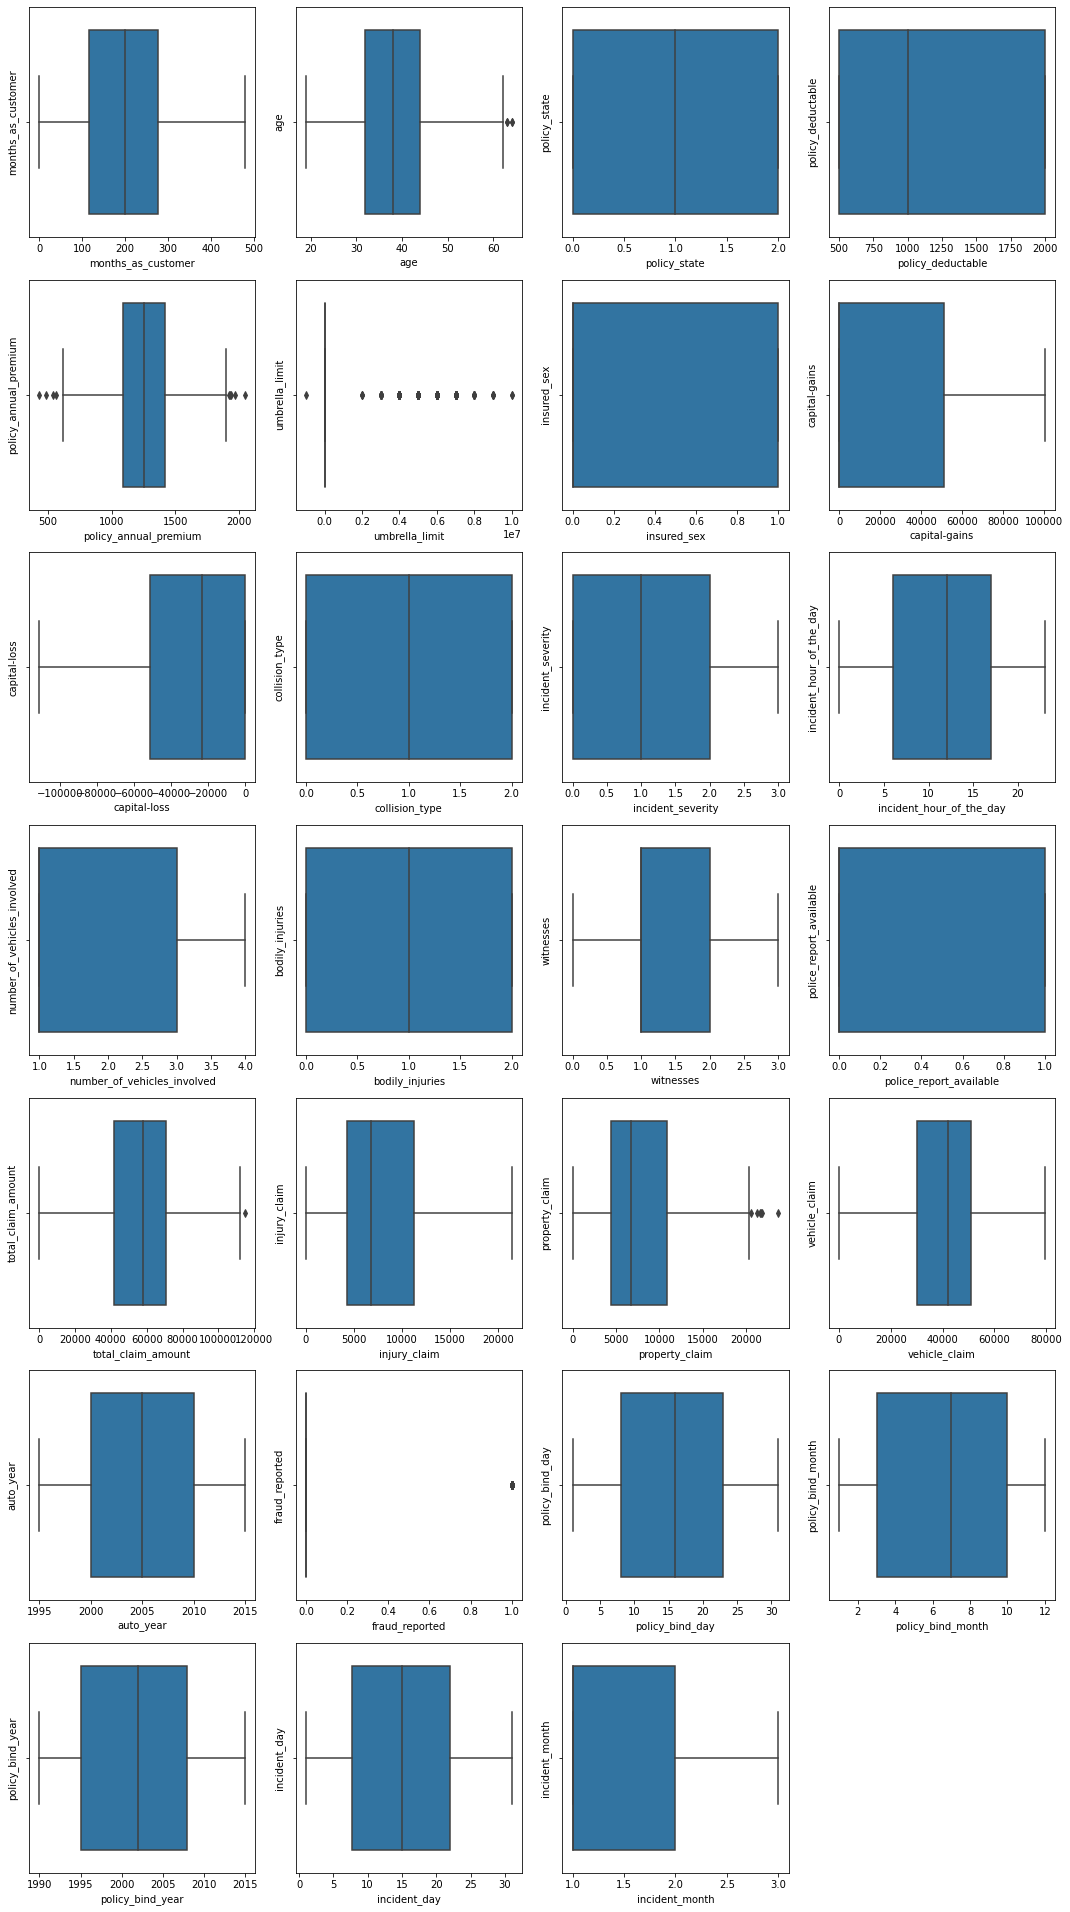

In [70]:
#Checking for outliers

plt.figure(figsize = (15,30))
graph = 1

for column in df:
    if graph <=27:
        ax = plt.subplot(8,4,graph)
        sns.boxplot(df[column], orient ='h')
        plt.xlabel(column,fontsize=10)
        plt.ylabel(column,fontsize=10)
    graph+=1   
plt.tight_layout()

In [74]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'capital-gains', 'capital-loss', 'collision_type', 'incident_severity',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported', 'policy_bind_day', 'policy_bind_month',
       'policy_bind_year', 'incident_day', 'incident_month'],
      dtype='object')

In [75]:
df.shape

(1000, 27)

In [76]:
# Removing outliers with Z-score


                 
from scipy.stats import zscore

z_score = zscore(df[['umbrella_limit','policy_annual_premium',]])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

df= df[filtering_entry]

In [77]:
df.shape

(982, 27)

In [78]:
# Checking data lost

print ('Data lost = ', ((1000-982)/1000)*100 , '%')

Data lost =  1.7999999999999998 %


In [79]:
x = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [82]:
# Data Scaling Using RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [85]:
# Finding best random state for data splitting

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [87]:
maxAcc = 0
maxRS=0

for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    acc=accuracy_score(y_test, predf)
    
    if acc>maxAcc:
        maxAcc=acc
        macRS = i
print('Best Accuracy=',maxAcc, "Random state=",macRS)    

Best Accuracy= 0.8211382113821138 Random state= 337


In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=337)

In [89]:
# Importing SMOTE for OverSampling
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE()

ove_smp = SMOTE(0.80)

x_train_ns, y_train_ns = ove_smp.fit_resample(x_train,y_train)

print ("number of samples before fit{}".format(Counter(y_train))) 
print ("number of samples after fit{}".format(Counter(y_train_ns)))   


number of samples before fitCounter({0: 543, 1: 193})
number of samples after fitCounter({0: 543, 1: 434})


In [90]:
y_train = y_train_ns
x_train = x_train_ns

In [91]:
#ModeL building with Logistic Regression
LR.fit(x_train,y_train)

predict_=LR.predict(x_test)

print("Accuracy",accuracy_score(y_test,predict_)*100)

print(confusion_matrix(y_test,predict_))
print(classification_report(y_test,predict_))


Accuracy 76.42276422764228
[[175  24]
 [ 34  13]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       199
           1       0.35      0.28      0.31        47

    accuracy                           0.76       246
   macro avg       0.59      0.58      0.58       246
weighted avg       0.74      0.76      0.75       246



In [92]:
# ModeL building with Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)
pred = dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


Accuracy 0.7195121951219512
[[150  49]
 [ 20  27]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       199
           1       0.36      0.57      0.44        47

    accuracy                           0.72       246
   macro avg       0.62      0.66      0.63       246
weighted avg       0.78      0.72      0.74       246



In [93]:
#ModeL building with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train,y_train)
pred = rf.predict(x_test)

print('Accurecy',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accurecy 81.70731707317073
[[174  25]
 [ 20  27]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       199
           1       0.52      0.57      0.55        47

    accuracy                           0.82       246
   macro avg       0.71      0.72      0.72       246
weighted avg       0.82      0.82      0.82       246



In [94]:
#ModeL building with SVC
from sklearn.svm import SVC
svc=SVC()

svc.fit(x_train,y_train)
new_pred = svc.predict(x_test)

print('Accurecy',accuracy_score(y_test,new_pred)*100)
print(confusion_matrix(y_test,new_pred))
print(classification_report(y_test,new_pred))

Accurecy 79.26829268292683
[[193   6]
 [ 45   2]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       199
           1       0.25      0.04      0.07        47

    accuracy                           0.79       246
   macro avg       0.53      0.51      0.48       246
weighted avg       0.70      0.79      0.73       246



In [95]:
#ModeL building with SGD
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)

new_pred = sgd.predict(x_test)

print('Accurecy',accuracy_score(y_test,new_pred)*100)
print(confusion_matrix(y_test,new_pred))
print(classification_report(y_test,new_pred))

Accurecy 76.82926829268293
[[172  27]
 [ 30  17]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       199
           1       0.39      0.36      0.37        47

    accuracy                           0.77       246
   macro avg       0.62      0.61      0.62       246
weighted avg       0.76      0.77      0.77       246



In [96]:
#ModeL building with GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)

y_pred = gbk.predict(x_test)

print ('Accuracy=', accuracy_score(y_test, y_pred)*100)
print ('Confusion Matrix', confusion_matrix(y_test, y_pred))
print ('Classification Report', classification_report(y_test, y_pred))

Accuracy= 79.26829268292683
Confusion Matrix [[169  30]
 [ 21  26]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.85      0.87       199
           1       0.46      0.55      0.50        47

    accuracy                           0.79       246
   macro avg       0.68      0.70      0.69       246
weighted avg       0.81      0.79      0.80       246



In [99]:
# Cross Validation
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x,y, cv=8)
print("Cross validation score for Logistic Regression is", scr.mean())
scr = cross_val_score(dt, x,y, cv=8)
print("Cross validation score for Decision tree is", scr.mean())
scr = cross_val_score(rf, x,y, cv=8)
print("Cross validation score for RandomForestClassifier is", scr.mean())
scr = cross_val_score(svc, x,y, cv=8)
print("Cross validation score for SVC is", scr.mean())
scr = cross_val_score(sgd, x,y, cv=8)
print("Cross validation score for  SGDClassifier is", scr.mean())
scr = cross_val_score(gbk, x,y, cv=8)
print("Cross validation score for GradientBoostingClassifier is", scr.mean())



Cross validation score for Logistic Regression is 0.7555977608956418
Cross validation score for Decision tree is 0.6925979608156737
Cross validation score for RandomForestClassifier is 0.7801379448220711
Cross validation score for SVC is 0.7555977608956417
Cross validation score for  SGDClassifier is 0.726067906170865
Cross validation score for GradientBoostingClassifier is 0.7729991336798614


In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

param_grid = {
    "n_estimators":[5,50,250,500,750],
    "max_depth":[1,3,5,7,9,11,13],
    "learning_rate":[0.01,0.1,1,10,100,1000],
    "min_samples_split":[2,3,4,6,8]}

In [104]:
# Importing and fitting GSCV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(gbk,param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100, 1000],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13],
                         'min_samples_split': [2, 3, 4, 6, 8],
                         'n_estimators': [5, 50, 250, 500, 750]})

In [105]:
print(grid.best_estimator_)

GradientBoostingClassifier(learning_rate=1, max_depth=11, min_samples_split=6,
                           n_estimators=50)


In [106]:
grid_pred = grid.best_estimator_.predict(x_test)

accuracy_score(y_test, grid_pred)

0.8048780487804879

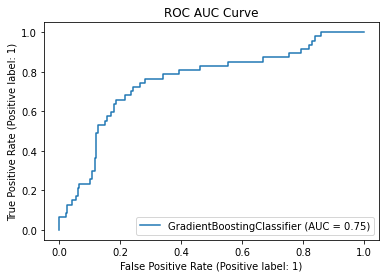

In [107]:
# ROC AUC Curve

from sklearn.metrics import plot_roc_curve

plot_roc_curve(grid.best_estimator_,x_test, y_test)

plt.title("ROC AUC Curve")

plt.show()

In [108]:
# Saving Model

import joblib


joblib.dump(grid.best_estimator_,"Auto_insurance.pkl")

['Auto_insurance.pkl']